Задача:
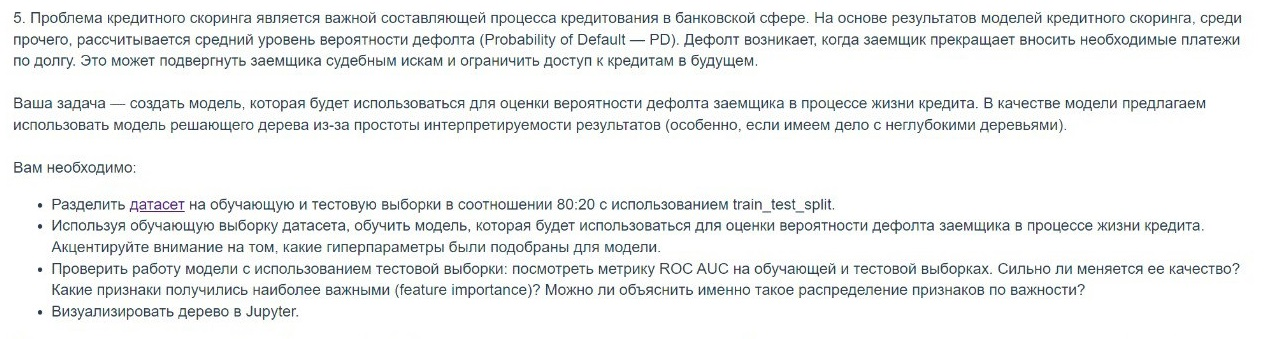

####Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (roc_auc_score, classification_report)
from sklearn.model_selection import GridSearchCV

Данные по ссылке: https://drive.google.com/file/d/13CL8jYlxVV6eHtUH4dQwOvkNKscEcqhr/view

In [2]:
DATASET_PATH = 'UCI_Credit_Card.csv'
df = pd.read_csv(DATASET_PATH)

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

####Диаграмма соотношения классов

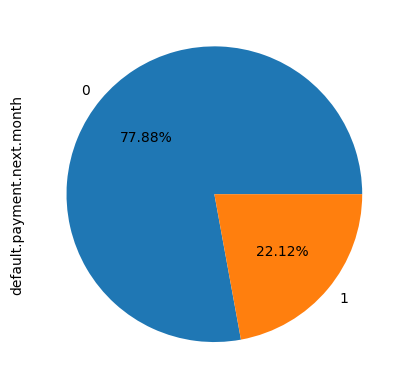

In [5]:
df['default.payment.next.month'].value_counts().plot(kind='pie', autopct='%.2f%%');

####Разделение на обучающую и тестовую выборки

In [6]:
X = df.drop(columns=['default.payment.next.month','ID'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=2)
X_train.shape, X_test.shape

((24000, 23), (6000, 23))

####Обучение модели

Обучение модели без заданных гиперпараметров

In [7]:
model = DecisionTreeClassifier(random_state=40)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [8]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

pred_proba_test = model.predict_proba(X_train)

После обучения модели без заданных гиперпараметров, метрика ROC AUC на обучающей выборке стремится к идеальному значению 1. При оценке качества модели на тестовой выборке, метрика ROC AUC  равняется 0.63, что свидетельствует о переобучении модели

In [9]:
roc_auc_train = roc_auc_score(y_train, pred_train)
roc_auc_test = roc_auc_score(y_test, pred_test)

print("ROC AUC на обучающей выборке:", roc_auc_train)
print("ROC AUC на тестовой выборке:", roc_auc_test)

ROC AUC на обучающей выборке: 0.9990582030514221
ROC AUC на тестовой выборке: 0.6256266860998688


In [10]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4673
           1       0.40      0.44      0.42      1327

    accuracy                           0.73      6000
   macro avg       0.62      0.63      0.62      6000
weighted avg       0.74      0.73      0.73      6000



Настройка гиперпараметров модели с помощью метода "Поиск по сетке"

In [11]:
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [12, 14, 16, 18]
}

In [12]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='roc_auc')

In [13]:
print("Наилучшие гиперпараметры:", grid_search.best_params_)

Наилучшие гиперпараметры: {'max_depth': 6, 'max_features': 14, 'min_samples_leaf': 3, 'min_samples_split': 2}


Построение тепловой карты

In [14]:
results = grid_search.cv_results_
param_names = list(param_grid.keys())

x_values = results['param_' + param_names[0]].data
y_values = results['param_' + param_names[1]].data

z_values = results['mean_test_score']

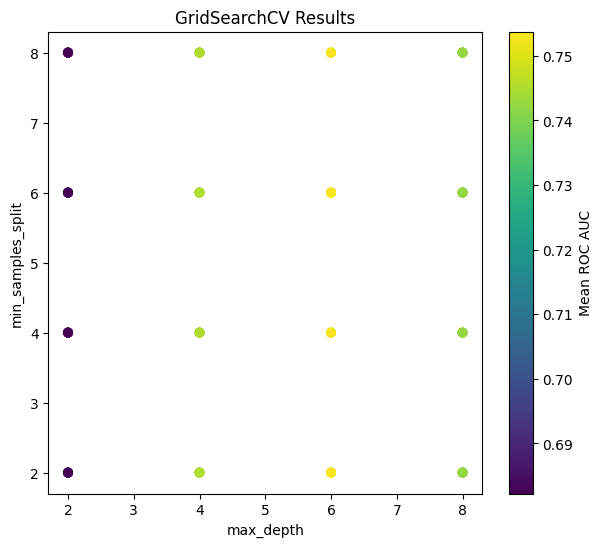

In [15]:
plt.figure(figsize=(7, 6))
plt.scatter(x_values, y_values, c=z_values, cmap='viridis')
plt.colorbar(label='Mean ROC AUC')
plt.xlabel(param_names[0])
plt.ylabel(param_names[1])
plt.title('GridSearchCV Results')

plt.show()

Обучение модели с заданными гиперпараметрами

In [16]:
model = DecisionTreeClassifier(max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=2, random_state=40)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=14, min_samples_leaf=3,
                       random_state=40)

In [17]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

pred_proba_test = model.predict_proba(X_train)

После обучения модели с заданными гиперпараметрами, метрика ROC AUC на обучающей выборке равняется 0.66. При оценке качества модели на тестовой выборке, метрика ROC AUC  равняется 0.65. С помощью задания оптимальных гиперпараметров мы добились адекватного обучения модели и улучшили метрик классификации

In [18]:
roc_auc_train = roc_auc_score(y_train, pred_train)
roc_auc_test = roc_auc_score(y_test, pred_test)

print("ROC AUC на обучающей выборке:", roc_auc_train)
print("ROC AUC на тестовой выборке:", roc_auc_test)

ROC AUC на обучающей выборке: 0.6439934824889911
ROC AUC на тестовой выборке: 0.6346800415605627


In [19]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.70      0.31      0.43      1327

    accuracy                           0.82      6000
   macro avg       0.77      0.63      0.66      6000
weighted avg       0.80      0.82      0.79      6000



Признак PAY_0 модель определила как наиболее важный

<Axes: >

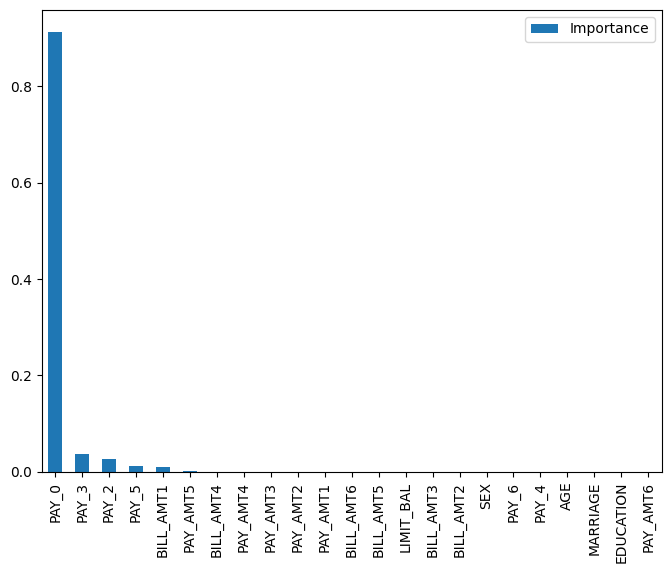

In [20]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

####Визуализация дерева решений

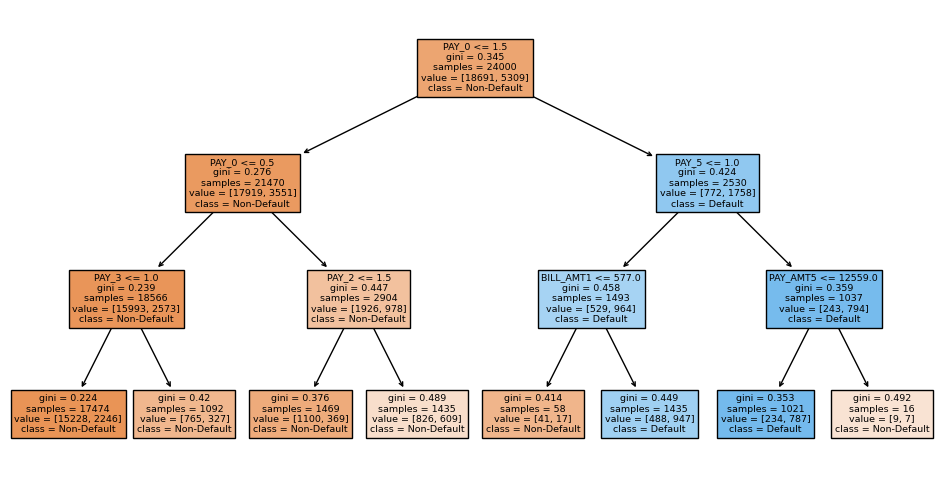

In [21]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['Non-Default', 'Default'], filled=True)
plt.show()